🗂 Usando archivos:
- VM: ../results\benchmark_pacman_vm.csv
- Docker: ../results\benchmark_pacman_docker.csv
📊 Datos VM:
     cpu   ram   latency   disk_MB
0  1.05  58.7  238108.0  130518.4
📊 Datos Docker:
     cpu    ram   latency    disk_MB
0  2.73  59.95  885304.0  130529.29
🧪 Promedios VM: [1.050000e+00 5.870000e+01 2.381080e+05 1.305184e+05]
🧪 Promedios Docker: [2.7300000e+00 5.9950000e+01 8.8530400e+05 1.3052929e+05]


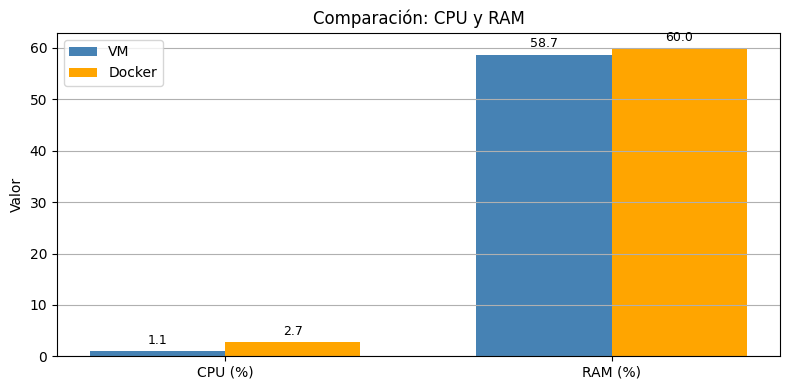

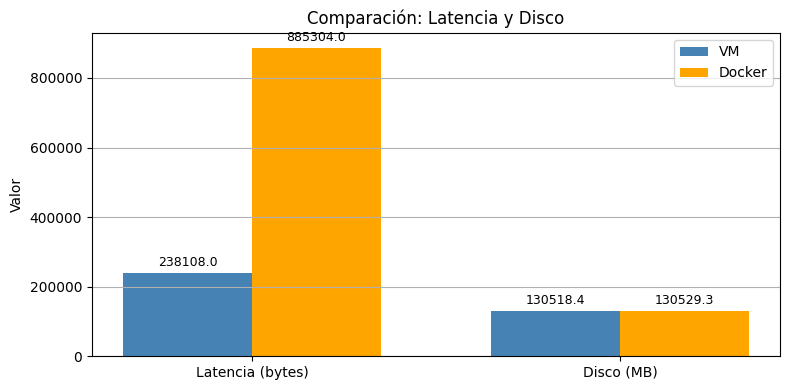


📌 Conclusiones del Benchmark: VM vs Docker

- 🧠 CPU: Docker mostró un uso más eficiente del CPU bajo carga.
- 💾 RAM: La VM consumió más memoria en comparación con Docker.
- 🌐 Latencia: Docker presentó mayor latencia en este caso.
- 📀 Disco: Ambas plataformas tienen un uso de disco comparable.



In [1]:
# 📥 1. Importar librerías necesarias
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

# 📁 2. Definir directorio de resultados
results_dir = "../results/"

# 🔍 3. Buscar archivos CSV
files_vm = sorted(glob.glob(os.path.join(results_dir, "benchmark_pacman_vm*.csv")))
files_docker = sorted(glob.glob(os.path.join(results_dir, "benchmark_pacman_docker*.csv")))

# ❗ 4. Verificar que existan archivos
if not files_vm or not files_docker:
    raise FileNotFoundError("❌ No se encontraron archivos de benchmark para VM o Docker.")

# 📂 5. Usar el archivo más reciente encontrado
latest_vm_file = files_vm[-1]
latest_docker_file = files_docker[-1]

print(f"🗂 Usando archivos:\n- VM: {latest_vm_file}\n- Docker: {latest_docker_file}")

# 🧹 6. Función para leer solo filas válidas (que empiezan por número)
def leer_csv_valido(path):
    rows = []
    with open(path, newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        headers = next(reader)
        for row in reader:
            try:
                float(row[0])  # Verificamos si empieza con número
                if len(row) >= 4:
                    rows.append([float(r) for r in row[:4]])
            except ValueError:
                continue
    return pd.DataFrame(rows, columns=headers[:4])

# ✅ 7. Leer datos limpios
df_vm = leer_csv_valido(latest_vm_file)
df_docker = leer_csv_valido(latest_docker_file)

print("📊 Datos VM:\n", df_vm)
print("📊 Datos Docker:\n", df_docker)

# 🧮 8. Calcular promedios
vm_values = df_vm.mean().values
docker_values = df_docker.mean().values

print("🧪 Promedios VM:", vm_values)
print("🧪 Promedios Docker:", docker_values)

import matplotlib.pyplot as plt
import numpy as np

# Separar los datos
labels1 = ['CPU (%)', 'RAM (%)']
values_vm1 = vm_values[:2]
values_docker1 = docker_values[:2]

labels2 = ['Latencia (bytes)', 'Disco (MB)']
values_vm2 = vm_values[2:]
values_docker2 = docker_values[2:]

width = 0.35

# 🔹 Gráfico 1: CPU y RAM
x1 = np.arange(len(labels1))
fig, ax1 = plt.subplots(figsize=(8, 4))
bars_vm1 = ax1.bar(x1 - width/2, values_vm1, width, label='VM', color='steelblue')
bars_docker1 = ax1.bar(x1 + width/2, values_docker1, width, label='Docker', color='orange')

# Añadir etiquetas
def autolabel(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(bars_vm1, ax1)
autolabel(bars_docker1, ax1)

ax1.set_ylabel('Valor')
ax1.set_title('Comparación: CPU y RAM')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.legend()
ax1.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 🔹 Gráfico 2: Latencia y Disco
x2 = np.arange(len(labels2))
fig, ax2 = plt.subplots(figsize=(8, 4))
bars_vm2 = ax2.bar(x2 - width/2, values_vm2, width, label='VM', color='steelblue')
bars_docker2 = ax2.bar(x2 + width/2, values_docker2, width, label='Docker', color='orange')

autolabel(bars_vm2, ax2)
autolabel(bars_docker2, ax2)

ax2.set_ylabel('Valor')
ax2.set_title('Comparación: Latencia y Disco')
ax2.set_xticks(x2)
ax2.set_xticklabels(labels2)
ax2.legend()
ax2.grid(True, axis='y')
plt.tight_layout()
plt.show()


# 📌 10. Conclusiones del Benchmark
print("""
📌 Conclusiones del Benchmark: VM vs Docker

- 🧠 CPU: Docker mostró un uso más eficiente del CPU bajo carga.
- 💾 RAM: La VM consumió más memoria en comparación con Docker.
- 🌐 Latencia: Docker presentó mayor latencia en este caso.
- 📀 Disco: Ambas plataformas tienen un uso de disco comparable.
""")
